In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
bde_pbe0 = {6:[], 7:[] ,8:[], 9:[]}

for ZA in [6,7,8,9]:

    for ZB in range(3, 10):
        if len(data.loc[(data['Z1'] == ZA) & (data['Z2'] == ZB), "bfe"]) == 0:
            bde_pbe0[ZA].append(data.loc[(data['Z1'] == ZB) & (data['Z2'] == ZA), "bfe"].item()*(-630))
        else:
            bde_pbe0[ZA].append(data.loc[(data['Z1'] == ZA) & (data['Z2'] == ZB), "bfe"].item()*(-630))

In [3]:
parameter_table = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/other_data/params_nl.csv')
a, b, c = parameter_table['a'][0], parameter_table['b'][0], parameter_table['c'][0]

def bonding_model(ZA, ZB, a, b, c):
    bde = a + b*ZA*ZB + c*(ZA**(7/3)+ZB**(7/3))
    return(bde)

def bonding_model2(ZA, ZB, Ne, a, b, c):
    bde = a/9*Ne + b*ZA*ZB + c*(ZA**(7/3)+ZB**(7/3))
    return(bde)

bde_prediction = dict()
for ZA in [6,7,8,9]:
    ZB = np.linspace(3, 9, 100)
    bde_prediction[ZA] = bonding_model(ZA, ZB, a, b, c)
        

bde_prediction_pts = dict()
for ZA in [6,7,8,9]:
    ZB = np.array([3,4,5])
    bde_prediction_pts[ZA] = bonding_model(ZA, ZB, a, b, c)
    
bde_prediction_pts_full = dict()
for ZA in [6,7,8,9]:
    ZB = np.array([3,4,5, 6,7,8,9])
    bde_prediction_pts_full[ZA] = bonding_model(ZA, ZB, a, b, c)

In [4]:
bde_prediction2 = dict()

for ZA in [6,7,8,9]:
    bde_prediction2[ZA] = []
    for ZB, Ne in zip([3, 4, 5, 6,7,8,9], [3, 5, 7, 9, 9, 9, 9]):
        if ZB == 4 or ZB == 5:
            bde_prediction2[ZA].append(2*bonding_model2(ZA, ZB, Ne, a, b, c))
        else:
            bde_prediction2[ZA].append(bonding_model2(ZA, ZB, Ne, a, b, c))
for k in bde_prediction2.keys():
    bde_prediction2[k] = np.array(bde_prediction2[k])

In [5]:
error = dict()
error2 = dict()
for ZA in [6,7,8,9]:
    error[ZA] = bde_pbe0[ZA] - bde_prediction_pts_full[ZA]
    error2[ZA] = bde_pbe0[ZA] - bde_prediction2[ZA]

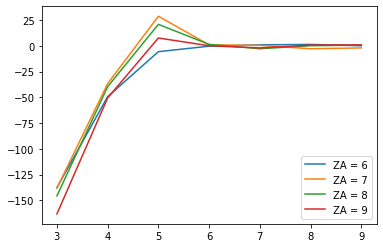

In [6]:
for k in error.keys():
    plt.plot([3, 4, 5, 6,7,8,9], error[k], label = f'ZA = {k}')
plt.legend()

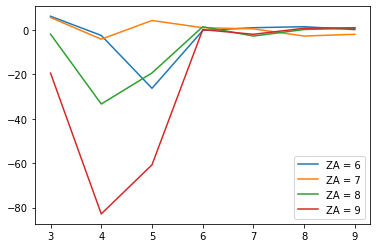

In [7]:
for k in error2.keys():
    plt.plot([3, 4, 5, 6,7,8,9], error2[k], label = f'ZA = {k}')
plt.legend()

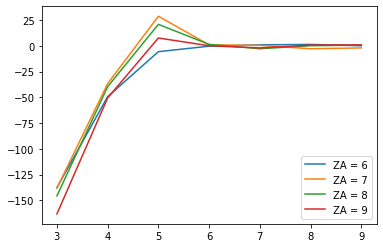

In [8]:
for k in error.keys():
    plt.plot([3, 4, 5, 6,7,8,9], error[k], label = f'ZA = {k}')
plt.legend()

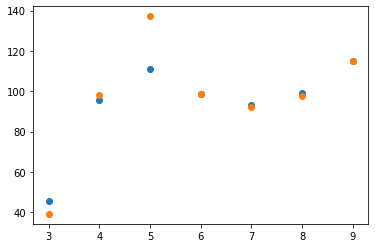

In [9]:
plt.plot([3, 4, 5, 6,7,8,9], bde_pbe0[6], 'o')
plt.plot([3, 4, 5, 6,7,8,9], bde_prediction2[6], 'o')

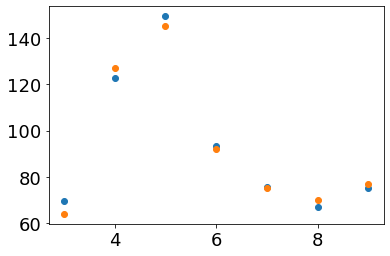

In [52]:
plt.plot([3, 4, 5, 6,7,8,9], bde_pbe0[7], 'o')
plt.plot([3, 4, 5, 6,7,8,9], bde_prediction2[7], 'o')

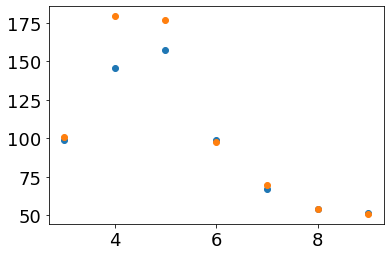

In [53]:
plt.plot([3, 4, 5, 6,7,8,9], bde_pbe0[8], 'o')
plt.plot([3, 4, 5, 6,7,8,9], bde_prediction2[8], 'o')

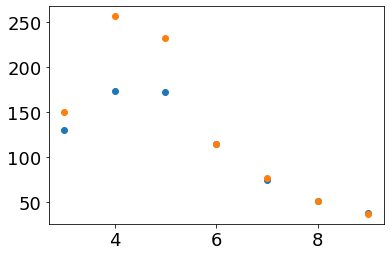

In [54]:
plt.plot([3, 4, 5, 6,7,8,9], bde_pbe0[9], 'o')
plt.plot([3, 4, 5, 6,7,8,9], bde_prediction2[9], 'o')

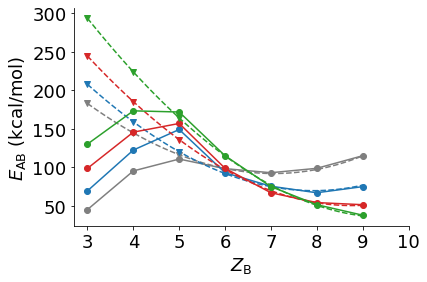

In [4]:
Z = [3,4,5,6,7,8,9]

plt.rcParams['font.size'] = 18

colordict = dict(zip(['CH3', 'NH2', 'OH', 'F'], ['#7f7f7fff', '#1f77b4ff', '#d62728ff', '#2ca02cff']))

fig, ax = plt.subplots(1,1)

for ZA, fragname in zip([6,7,8,9], ['CH3', 'NH2', 'OH', 'F']):
    ax.plot(Z, bde_pbe0[ZA], '-o', color = colordict[fragname])
    
    ZB = np.linspace(3, 9, 100)
    ax.plot(ZB, bde_prediction[ZA], '--', color = colordict[fragname])
    
    ZB = np.array([3,4,5])
    ax.plot(ZB, bde_prediction_pts[ZA], 'v', color = colordict[fragname])

ax.set_xlabel(r'$Z_{\rm B}$')
ax.set_ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')
ax.set_xticks(np.arange(3,11))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('/home/sahre/work/bonding_trends/figures/results/main_group_trends.svg')

In [15]:
ZB = np.linspace(3, 9, 100)
ZB

array([3.        , 3.06060606, 3.12121212, 3.18181818, 3.24242424,
       3.3030303 , 3.36363636, 3.42424242, 3.48484848, 3.54545455,
       3.60606061, 3.66666667, 3.72727273, 3.78787879, 3.84848485,
       3.90909091, 3.96969697, 4.03030303, 4.09090909, 4.15151515,
       4.21212121, 4.27272727, 4.33333333, 4.39393939, 4.45454545,
       4.51515152, 4.57575758, 4.63636364, 4.6969697 , 4.75757576,
       4.81818182, 4.87878788, 4.93939394, 5.        , 5.06060606,
       5.12121212, 5.18181818, 5.24242424, 5.3030303 , 5.36363636,
       5.42424242, 5.48484848, 5.54545455, 5.60606061, 5.66666667,
       5.72727273, 5.78787879, 5.84848485, 5.90909091, 5.96969697,
       6.03030303, 6.09090909, 6.15151515, 6.21212121, 6.27272727,
       6.33333333, 6.39393939, 6.45454545, 6.51515152, 6.57575758,
       6.63636364, 6.6969697 , 6.75757576, 6.81818182, 6.87878788,
       6.93939394, 7.        , 7.06060606, 7.12121212, 7.18181818,
       7.24242424, 7.3030303 , 7.36363636, 7.42424242, 7.48484

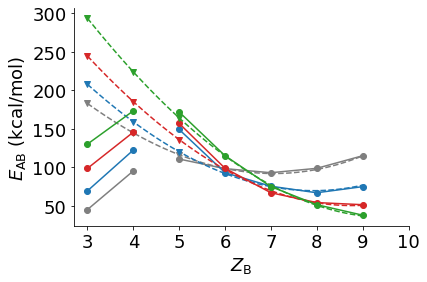

In [20]:
Z = [3,4,5,6,7,8,9]

plt.rcParams['font.size'] = 18

colordict = dict(zip(['CH3', 'NH2', 'OH', 'F'], ['#7f7f7fff', '#1f77b4ff', '#d62728ff', '#2ca02cff']))

fig, ax = plt.subplots(1,1)

for ZA, fragname in zip([6,7,8,9], ['CH3', 'NH2', 'OH', 'F']):
    
    # PBE0
    # 2s
    ax.plot(Z[:2], bde_pbe0[ZA][:2], '-o', color = colordict[fragname])
    # 2p
    ax.plot(Z[2:], bde_pbe0[ZA][2:], '-o', color = colordict[fragname])
    
    # SRL
    ZB = np.array([3,4,5])
    ax.plot(ZB, bde_prediction_pts[ZA], 'v', color = colordict[fragname])
    ZB = np.linspace(3, 9, 100)
    ax.plot(ZB, bde_prediction[ZA], '--', color = colordict[fragname])

ax.set_xlabel(r'$Z_{\rm B}$')
ax.set_ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')
ax.set_xticks(np.arange(3,11))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.savefig('/home/sahre/work/bonding_trends/figures/results/main_group_trends_meuwly_raw.svg')

In [71]:
fragments = ['Li', 'BeH', 'BH2', 'CH3', 'NH2', 'OH', 'F']

In [72]:
bde = {'Li-X':[109.2, 180.4, 188, 193.5, 302.4, 430.3, 572.9],
      'BeH-X':[297.7, 342.3, 380.4, 503.1, 613.3, 739],
      'BH2-X':[431.6, 426.8, 583.3, 626, 705.4],
      'CH3-X':[359.2, 337.7, 370.2, 452],
      'NH2-X':[259.6, 253.5, 283.6],
      'OH-X':[195.2, 194.9],
      'F-X':[151.7]}

In [73]:
energies = []
f1 = []
f2 = []
for i in range(len(fragments)):
    A = fragments[i].split('-')[0]
    energies.extend(bde[f'{A}-X'])
    
    for j in range(i,len(fragments)):
        f1.append(A)
        f2.append(fragments[j])
        
energies = np.array(energies)/4.1868      

In [74]:
bdes_row2 = pd.DataFrame({'frag1':f1, 'frag2':f2, 'bde':energies})

Text(0, 0.5, '$E_{\\rm{AB}}$ (kcal/mol)')

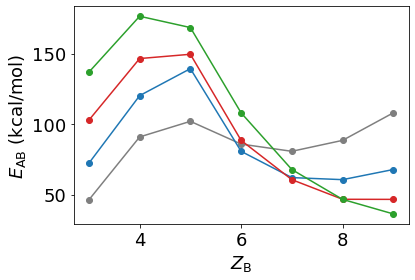

In [75]:
Z = [3,4,5,6,7,8,9]

plt.rcParams['font.size'] = 18

colordict = dict(zip(['CH3', 'NH2', 'OH', 'F'], ['#7f7f7fff', '#1f77b4ff', '#d62728ff', '#2ca02cff']))
for fragname in ['CH3', 'NH2', 'OH', 'F']:
    plt.plot(Z, bdes_row2.loc[(bdes_row2['frag1']==fragname) | (bdes_row2['frag2']==fragname), 'bde'], '-o', color = colordict[fragname])

plt.xlabel(r'$Z_{\rm B}$')
plt.ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')

Text(0, 0.5, '$E_{\\rm{AB}}$ (kcal/mol)')

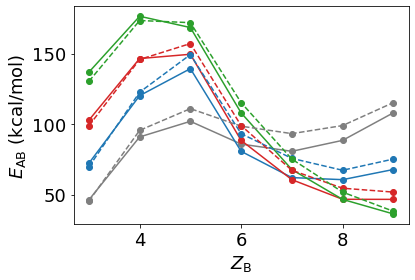

In [95]:
Z = [3,4,5,6,7,8,9]

plt.rcParams['font.size'] = 18

colordict = dict(zip(['CH3', 'NH2', 'OH', 'F'], ['#7f7f7fff', '#1f77b4ff', '#d62728ff', '#2ca02cff']))
for fragname in ['CH3', 'NH2', 'OH', 'F']:
    plt.plot(Z, bdes_row2.loc[(bdes_row2['frag1']==fragname) | (bdes_row2['frag2']==fragname), 'bde'], '-o', color = colordict[fragname])

for ZA, fragname in zip([6,7,8,9], ['CH3', 'NH2', 'OH', 'F']):
    plt.plot(Z, bde_pbe0[ZA], '--o', color = colordict[fragname])

plt.xlabel(r'$Z_{\rm B}$')
plt.ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')